# 데이터 준비
- 제공받은 날씨 데이터와 화재 데이터를 일자와 지역 구분1, 2를 기준으로 left join한 데이터프레임 활용

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

In [ ]:
# 결측치 처리 하기 이전 데이터 가져오기
df_b1 = pd.read_csv("data1.csv")
df_b2 = pd.read_csv("data2.csv")
df_b3 = pd.read_csv("data3.csv")
df_b4 = pd.read_csv("data4.csv")

# 데이터 다시 합치기
df_before = pd.concat([df_b1, df_b2, df_b3, df_b4])
df_before

,index,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,...,dead,injury,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym,hour,season
0,0,서울특별시,종로구,108,3.8,-5.1,8.9,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,서울특별시,종로구,108,1.8,-4.3,6.1,0.0,4.9,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,서울특별시,종로구,108,-0.4,-7.1,6.7,0.0,3.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,서울특별시,종로구,108,-0.7,-8.7,8.0,0.0,3.5,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,서울특별시,종로구,108,1.6,-5.6,7.2,0.0,3.6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138231,321572,충청남도,홍성군,608,30.7,25.8,4.9,0.0,4.1,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138232,321573,충청남도,홍성군,608,32.4,23.5,8.9,0.0,6.5,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138233,321574,충청남도,홍성군,608,34.2,21.5,12.7,0.0,7.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138234,321575,충청남도,홍성군,608,29.2,23.1,6.1,20.5,5.8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
# 데이터 정보 파악
df_before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558236 entries, 0 to 138235
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       558236 non-null  int64  
 1   district_1                  558236 non-null  object 
 2   district_2                  558236 non-null  object 
 3   stn                         558236 non-null  int64  
 4   ta_max                      555585 non-null  float64
 5   ta_min                      555584 non-null  float64
 6   ta_max_min                  555584 non-null  float64
 7   rn_day                      546002 non-null  float64
 8   ws_max                      558236 non-null  float64
 9   ws_ins_max                  558236 non-null  float64
 10  ws_mean                     557523 non-null  float64
 11  ws_min                      519589 non-null  float64
 12  hm_max                      474200 non-null  float64
 13  hm_mean            

In [ ]:
# 데이터 기초통계량 확인_기상정보 위주
weather_feature = df_before.describe().iloc[:,2:13]
weather_feature

,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
count,555585.000000,555584.000000,555584.000000,546002.000000,558236.000000,558236.000000,557523.000000,519589.000000,474200.000000,519509.000000,519570.000000
mean,19.020830,8.619694,10.400960,3.769835,4.191494,7.428218,1.673034,0.348925,87.008858,68.282830,45.559962
std,9.776427,10.485874,4.107818,14.132914,1.715017,2.920724,0.960850,0.557206,13.515958,15.974285,19.047859
min,-12.900000,-25.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,9.600000,1.000000
25%,11.300000,0.100000,7.500000,0.000000,3.000000,5.400000,1.000000,0.000000,80.600000,57.400000,30.600000
50%,20.300000,8.600000,10.100000,0.000000,3.900000,6.900000,1.500000,0.100000,91.900000,70.000000,44.400000
75%,27.100000,18.000000,13.000000,0.100000,5.000000,8.900000,2.100000,0.500000,97.400000,80.300000,58.400000
max,41.800000,31.400000,33.400000,413.000000,29.700000,43.400000,17.900000,10.200000,100.000000,100.000000,100.000000


array([[<Axes: title={'center': 'ta_max'}>,
        <Axes: title={'center': 'ta_min'}>,
        <Axes: title={'center': 'ta_max_min'}>],
       [<Axes: title={'center': 'rn_day'}>,
        <Axes: title={'center': 'ws_max'}>,
        <Axes: title={'center': 'ws_ins_max'}>],
       [<Axes: title={'center': 'ws_mean'}>,
        <Axes: title={'center': 'ws_min'}>,
        <Axes: title={'center': 'hm_max'}>],
       [<Axes: title={'center': 'hm_mean'}>,
        <Axes: title={'center': 'hm_min'}>, <Axes: >]], dtype=object)

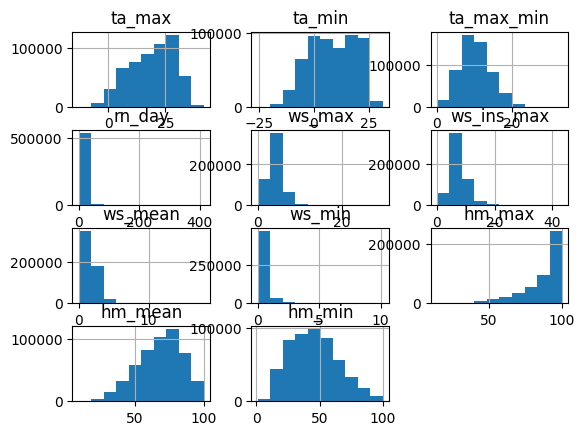

In [ ]:
# 기상 정보의 분포 확인
df_before[weather_feature.columns.tolist()].hist()

- rn_day와 ws_min의 경우 분포가 과하게 왼쪽에 치우친 모양 관찰
-> 피처의 유의미한 차이 관찰하기 어려움

## 결측치 처리
- 공공데이터를 통해 처리할 수 있는 공간은 처리하고 그 외에는 인접한 지역의 데이터로 처리
- 이 후 발생한 약 2만개의 결측치를 포함한 행은 dropna()

<Axes: >

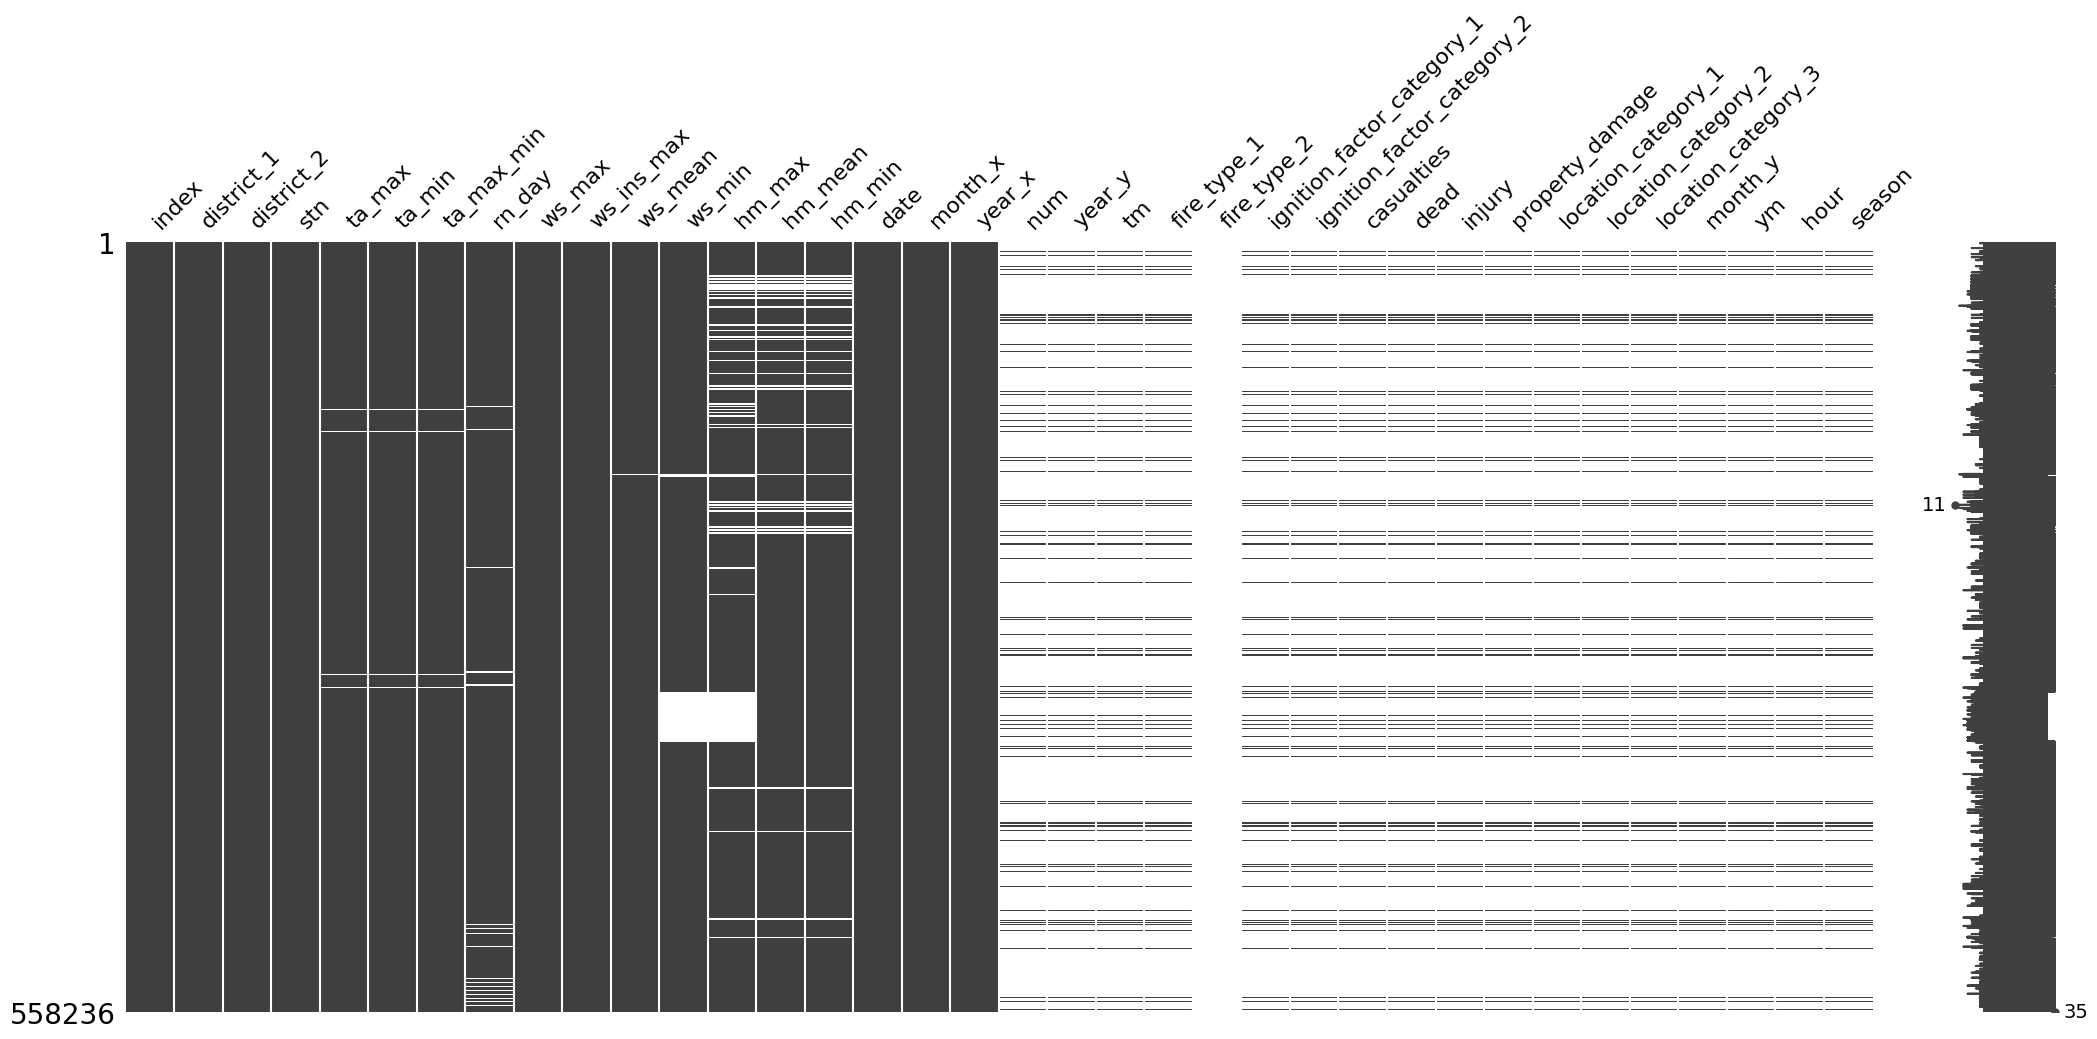

In [ ]:
# 결측치 처리 이전 데이터 결측치 분포 확인
msno.matrix(df_before)

In [ ]:
# 공공 데이터와 공간 보간을 활용해 결측치 처리
## 예시 : 전라북도 해안 일대를 인접한 지역인 전라북도의 부안 공공데이터로 결측치 처리

# 부안 풍속 데이터 가져오기
buan = pd.read_csv(("buan_wind.csv"), encoding='cp949', skiprows=13)
buan = buan.rename(columns={'일시': 'date', '평균풍속(m/s)' : 'ws_mean', '최대풍속(m/s)' : 'ws_max', '최대순간풍속(m/s)' : 'ws_ins_max'})
buan_ws = buan[['date', 'ws_mean', 'ws_max', 'ws_ins_max']]
buan_ws

,date,ws_mean,ws_max,ws_ins_max
0,2018-01-01,0.7,3.2,5.4
1,2018-01-02,1.0,2.8,4.9
2,2018-01-03,1.7,4.5,7.6
3,2018-01-04,1.2,3.2,5.0
4,2018-01-05,0.9,3.5,6.3
...,...,...,...,...
2179,2023-12-27,0.6,2.1,3.3
2180,2023-12-28,0.6,2.5,5.3
2181,2023-12-29,0.5,2.6,4.4
2182,2023-12-30,0.9,2.7,4.5


In [ ]:
# 전북특별자치도와 특정 지역에 해당하는 조건 설정
condition = (df_before['district_1'] == '전북특별자치도') & (df_before['district_2'].isin(['군산시', '김제시', '부안군', '고창군', '정읍시']))

# 처리 이전 결측치 개수 출력
print('처리 이전 결측치 개수: ', df_before[condition]['ws_mean'].isna().sum())

if condition.any():
    # 조건에 해당하는 행을 복사하여 새로운 데이터프레임 생성
    df_filtered = df_before[condition].copy()

    # 조건에 해당하는 행과 buan_ws 데이터프레임을 날짜(date) 기준으로 병합
    df_filtered = df_filtered.merge(buan_ws, on='date', how='left', suffixes=('', '_ref'))

    # 결측치 대체
    for i in ['ws_mean', 'ws_max', 'ws_ins_max']:
        df_filtered[i] = df_filtered[i].fillna(df_filtered[f'{i}_ref'])

    # 병합 결과에서 사용된 보조 열 제거
    df_filtered = df_filtered.drop(['ws_mean_ref', 'ws_max_ref', 'ws_ins_max_ref'], axis=1)

    # 원본 데이터프레임에서 조건에 해당하는 행 제거 후 결측치 대체된 행 추가
    df_before = pd.concat([df_before[~condition], df_filtered])

    # 병합 후 원본 데이터프레임과 일치하도록 condition을 다시 정의
    condition = (df_before['district_1'] == '전북특별자치도') & (df_before['district_2'].isin(['군산시', '김제시', '부안군', '고창군', '정읍시']))

# 처리한 이후의 결측치 개수 출력
print('처리 이후 결측치 개수 :', df_before[condition]['ws_mean'].isna().sum())

처리 이전 결측치 개수:  15
처리 이후 결측치 개수 : 0


In [ ]:
# 결과 데이터 가져오기
df_1 = pd.read_csv("df_all_1.csv")
df_2 = pd.read_csv("df_all_2.csv")
df_3 = pd.read_csv("df_all_3.csv")
df_4 = pd.read_csv("df_all_4.csv")

<Axes: >

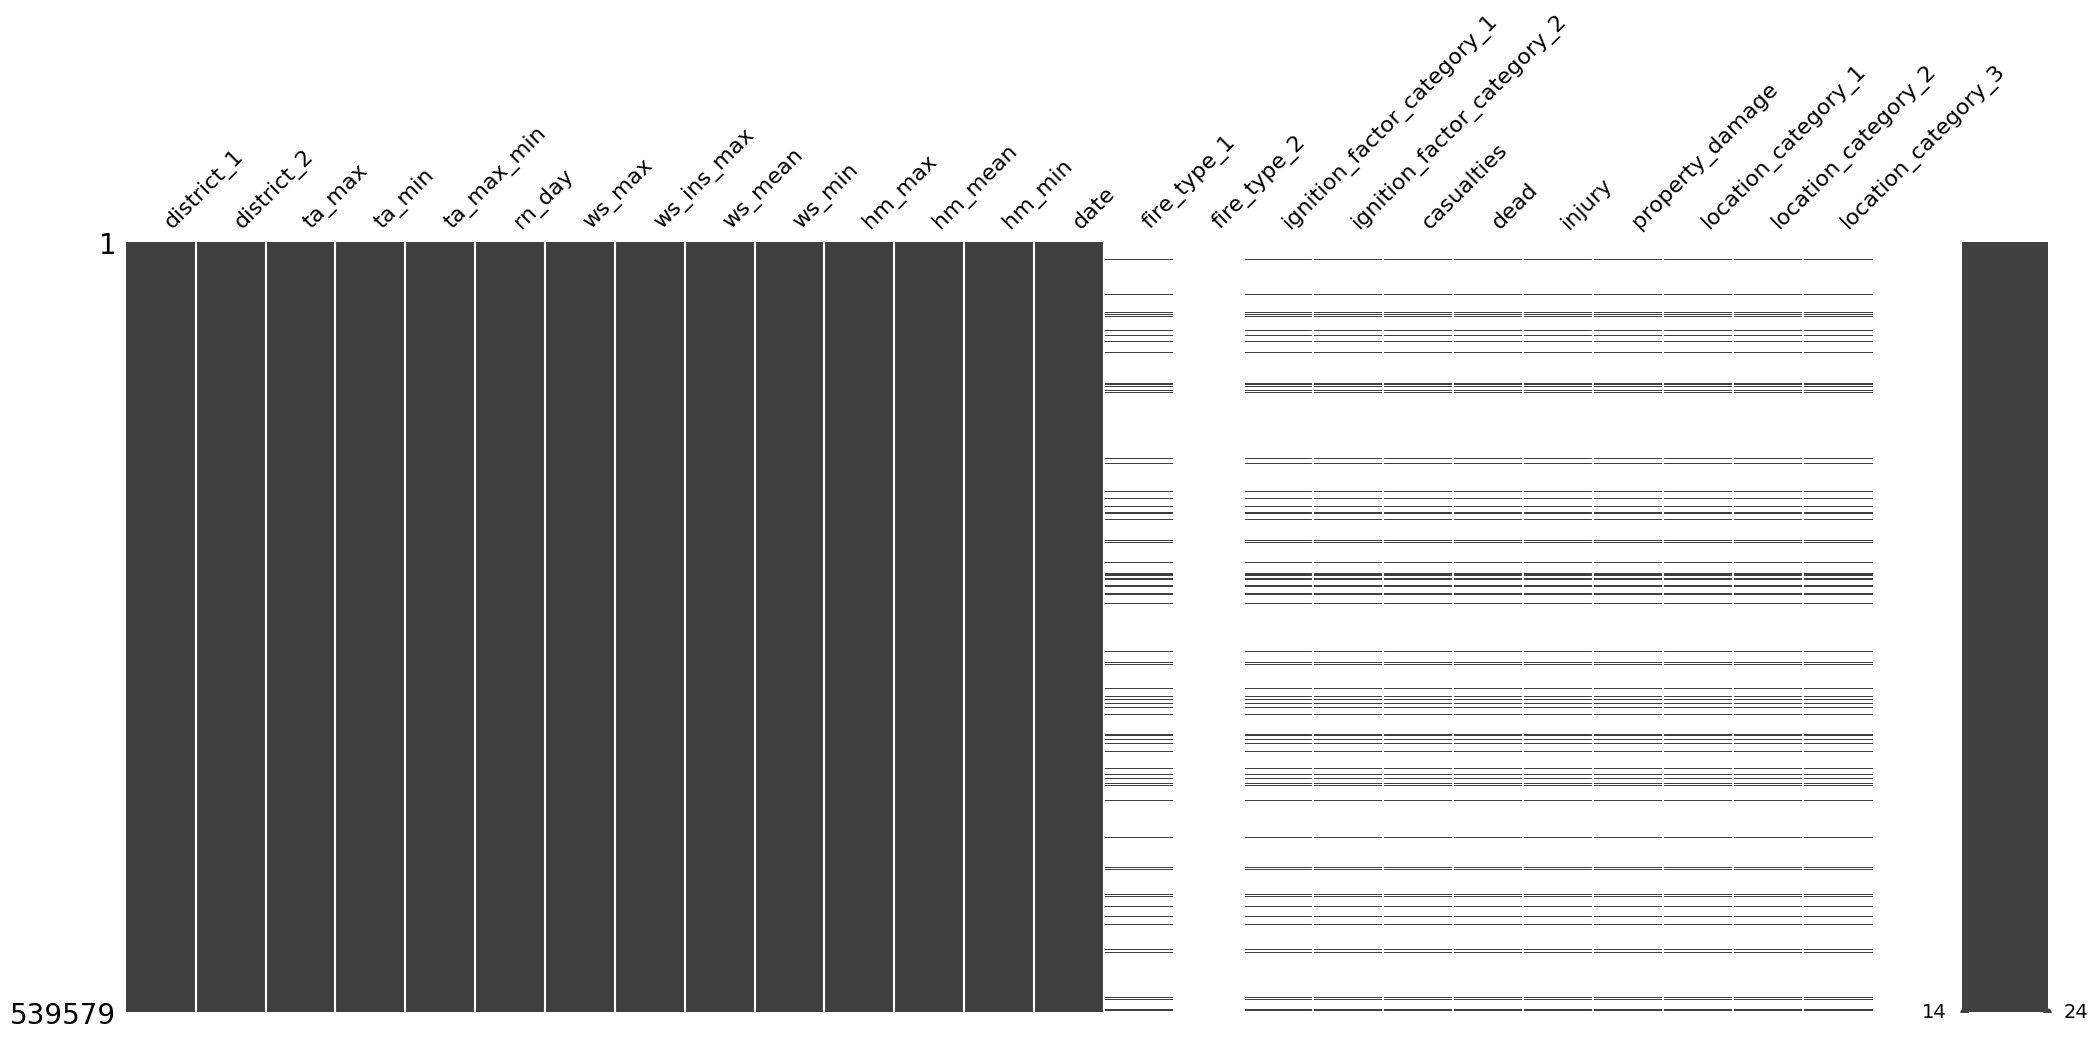

In [ ]:
# 데이터 다시 합치기
df = pd.concat([df_1, df_2, df_3, df_4])
# 처리한 결측치 확인
msno.matrix(df)

In [ ]:
# 지역별로 구분한 데이터 가져오기
import pandas as pd
inland1 = pd.read_csv("inland_some2.csv")
inland2 = pd.read_csv("inland_some.csv")
seohae = pd.read_csv("seohae.csv")
sea_mt = pd.read_csv("taebaek_mountain.csv")
in_mt = pd.read_csv("inland_mountain.csv")
namhae = pd.read_csv("namhaean.csv")

## 지역별 발생 요인의 차이

In [ ]:
import pandas as pd

# 데이터프레임 리스트 및 해당 이름 리스트 생성
dataframes = [inland1, inland2, sea_mt, in_mt, seohae, namhae]
names = ['Inland 1', 'Inland 2', 'Sea & Mountain', 'Inland & Mountain', 'Seohae', 'Namhae']

# 결과를 저장할 리스트
factor_list = []

# ignition_factor_category_2의 비율을 구하는 함수
def factor(df, name):
    df_t = df[['district_1', 'district_2', 'ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max',
               'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min',
               'date', 'fire_type_1', 'fire_type_2', 'ignition_factor_category_1',
               'ignition_factor_category_2', 'casualties', 'dead', 'injury',
               'property_damage', 'location_category_1', 'location_category_2', 'location_category_3']]

    df_t = df_t.dropna(subset=['dead'])
    df_factor = df_t.value_counts('ignition_factor_category_2', normalize=True).reset_index(name='prop(%)').nlargest(10, 'prop(%)')
    df_factor['prop(%)'] = df_factor['prop(%)'].round(4) * 100
    df_factor = df_factor.rename(columns={'ignition_factor_category_2': f'{name} 화재 요인'})
    factor_list.append(df_factor)

# 지역별 함수 적용
for df, name in zip(dataframes, names):
    factor(df, name)

# 동시에 비교
df_cat = pd.concat(factor_list, axis=1)
df_cat

,Inland 1 화재 요인,prop(%),Inland 2 화재 요인,prop(%),Sea & Mountain 화재 요인,prop(%),Inland & Mountain 화재 요인,prop(%),Seohae 화재 요인,prop(%),Namhae 화재 요인,prop(%)
0,담배꽁초,63.57,담배꽁초,32.10,담배꽁초,30.55,쓰레기 소각,28.80,담배꽁초,28.81,담배꽁초,61.07
1,쓰레기 소각,6.54,쓰레기 소각,17.88,쓰레기 소각,16.00,담배꽁초,13.56,쓰레기 소각,17.73,쓰레기 소각,9.22
2,미상,4.49,불씨/불꽃/화원방치,8.76,불씨/불꽃/화원방치,15.34,불씨/불꽃/화원방치,13.51,불씨/불꽃/화원방치,9.22,미상,5.03
3,불씨/불꽃/화원방치,3.85,미상,5.09,미상,5.66,논/임야태우기,7.84,논/임야태우기,8.62,불씨/불꽃/화원방치,4.41
4,기타(부주의),2.06,기타(부주의),4.46,용접/ 절단/ 연마,5.13,기타(부주의),6.06,과열/ 과부하,4.06,미확인단락,2.25
5,방화의심,1.79,논/임야태우기,4.07,기타(부주의),4.74,미상,5.76,기타(부주의),3.62,방화의심,1.68
6,용접/ 절단/ 연마,1.72,용접/ 절단/ 연마,3.14,논/임야태우기,1.91,용접/ 절단/ 연마,2.08,용접/ 절단/ 연마,3.13,기타(부주의),1.41
7,절연열화에 의한 단락,1.63,과열/ 과부하,2.08,미확인단락,1.78,기타,1.95,미확인단락,2.96,절연열화에 의한 단락,1.41
8,논/임야태우기,1.27,방화의심,1.98,과부하/과전류,1.45,미확인단락,1.91,절연열화에 의한 단락,2.14,불장난,1.37
9,불장난,1.24,절연열화에 의한 단락,1.98,자연발화,1.38,과열/ 과부하,1.82,자연발화,1.81,용접/ 절단/ 연마,1.23


# 데이터 분석

## 지역별 카이제곱을 통한 피처의 영향도 관찰

In [ ]:
# 데이터 범주화
def chi(df) :
    weather_features = ['ta_max','ta_min', 'ta_max_min', 'ws_max', 'ws_ins_max', 'ws_mean', 'hm_max', 'hm_mean', 'hm_min']
    for i in weather_features :
        df[f'{i}_cut'] = pd.qcut(df[i], 5, labels = [1,2,3,4,5])

    # 화재 발생여부에 따라 data 분할
    set1 = df.query('not ym.isna()')
    set2 = df.query('ym.isna()')

    # 범주화한 피처 기준으로 그룹화
    cut_features = ['ta_max_cut', 'ta_min_cut','ta_max_min_cut', 'ws_max_cut', 'ws_ins_max_cut', 'ws_mean_cut', 'hm_max_cut', 'hm_mean_cut', 'hm_min_cut']

    cut_df = pd.DataFrame({'grade' :['매우낮음', '낮음', '보통', '높음', '매우 높음']})

    for i in cut_features :
        for_set_1 = set1.groupby(i).size().reset_index(name='size')
        for_set_2 = set2.groupby(i).size().reset_index(name='size')
        cut_df[f'{i}_fire O'] = for_set_1['size']
        cut_df[f'{i}_fire X'] = for_set_2['size']

    # 카이제곱 결과 가져오기
    from scipy.stats import chi2_contingency

    p_value_list = []

    for i in range(1,19,2):
        for_chi = cut_df.iloc[:, i : i+2]
        chi2_stat, p_val, dof, expected = chi2_contingency(for_chi)
        p_value_list.append(p_val)
    return p_value_list

In [ ]:
# 지역별 카이제곱 결과 불러오기
chi_result = pd.DataFrame({'피처' : ['최대기온', '최저기온', '일교차', '최대풍속', '최대순간풍속', '평균풍속', '최대습도', '평균습도', '최저습도'],
                           '서울/광주/대구' : chi(inland1),
                           '대전/세종/충남' : chi(inland2),
                           '태백산맥~동해안' : chi(sea_mt),
                           '내륙산간' : chi(in_mt),
                           '서해안' : chi(seohae),
                           '남해안' : chi(namhae)})
chi_result.set_index('피처', inplace = True)
chi_result

,서울/광주/대구,대전/세종/충남,태백산맥~동해안,내륙산간,서해안,남해안
피처,,,,,,
최대기온,9.950536e-19,1.117219e-14,2.084287e-04,2.233676e-15,5.527183e-15,2.064420e-30
최저기온,5.483866e-57,9.723411e-43,3.177853e-11,7.594494e-62,6.786280e-28,4.479839e-50
일교차,1.108086e-67,2.115879e-130,1.172940e-13,6.941793e-153,2.473399e-66,1.781344e-37
최대풍속,2.907003e-43,6.793388e-30,4.577395e-40,2.108669e-11,8.453054e-07,1.853397e-01
최대순간풍속,3.887457e-41,4.675281e-28,1.633034e-38,1.982215e-16,2.675443e-04,2.619873e-03
평균풍속,4.750243e-51,4.501719e-17,6.968775e-54,2.575664e-04,1.087952e-10,2.423331e-09
최대습도,4.208345e-208,2.912805e-182,4.411282e-121,2.017870e-104,5.301361e-07,2.261159e-61
평균습도,2.791698e-305,2.047300e-260,5.346240e-149,8.113393e-186,1.603490e-47,7.494520e-78
최저습도,2.552565e-277,6.485304e-228,4.104579e-114,6.771182e-180,1.245225e-89,8.939012e-78


## 지역별 유의미한 피처 시각화

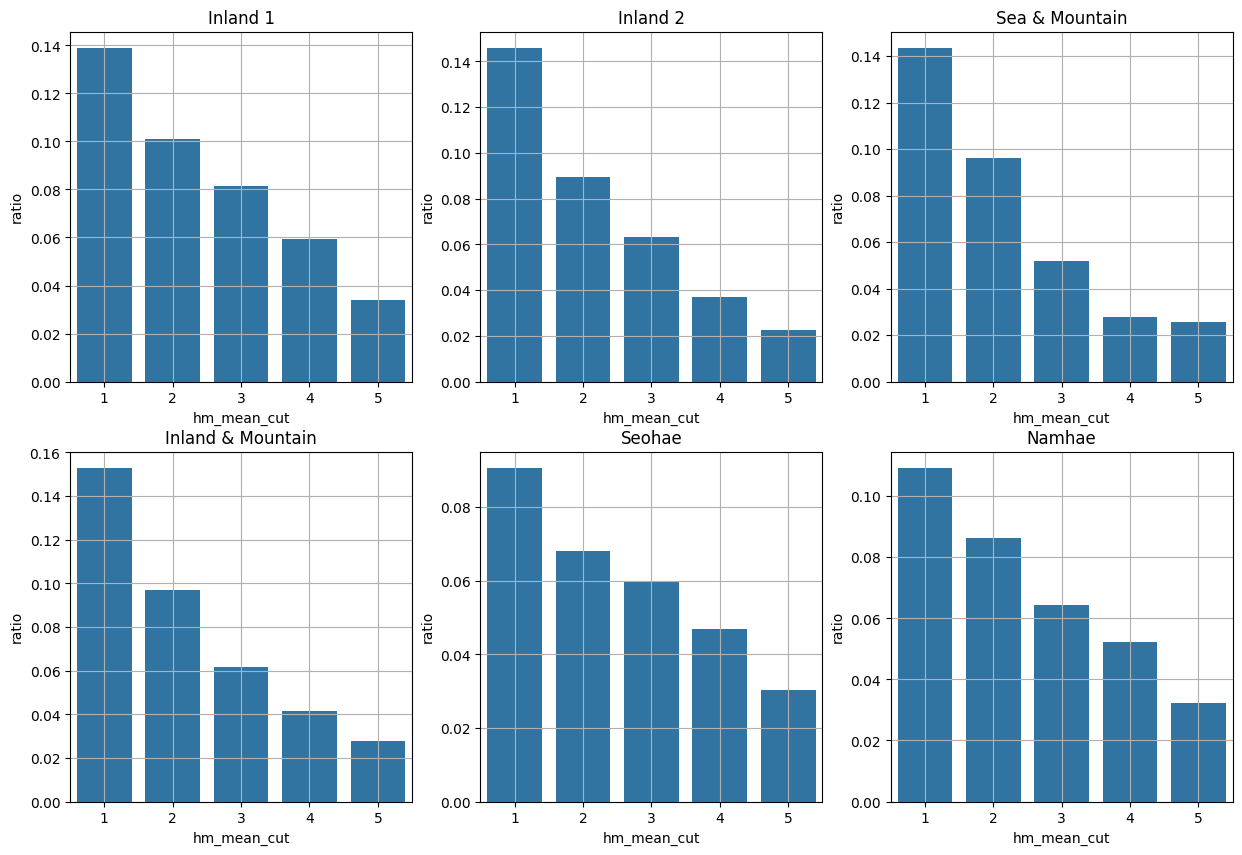

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,10))

df_list = [inland1, inland2, sea_mt, in_mt, seohae, namhae]
titles = ['Inland 1', 'Inland 2', 'Sea & Mountain', 'Inland & Mountain', 'Seohae', 'Namhae']
best_feature = 'hm_mean_cut'

for i, (df, title) in enumerate(zip(df_list, titles)) :
    df = df.copy()
    df['fire'] = np.where(df['ym'].isna(), 'fire x', 'fire o')
    df_group1 = df.query('fire=="fire o"').groupby(best_feature).size().reset_index(name='O')
    df_group2 = df.query('fire=="fire x"').groupby(best_feature).size().reset_index(name='x')
    merged_df = df_group1.merge(df_group2)
    merged_df['ratio'] = round(merged_df['O'] / merged_df.iloc[:, 1:3].sum(axis=1),4)
    ax = ax.flatten()
    sns.barplot(x = best_feature, y='ratio', data = merged_df, ax = ax[i])
    ax[i].set_title(title)
    ax[i].grid(True)


## xgboost를 활용한 피처 관찰

In [ ]:
# 라이브러리 불러오기
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def xgboost(df) :
  # 화재 컬럼 생성
    df_t = df.copy()
    df_t['fire'] = np.where(df['ym'].isna(), 0, 1)

  # 피처 정리
    X = df_t[['ta_max', 'ta_min', 'ta_max_min', 'ws_max',
              'ws_ins_max', 'ws_mean','hm_max', 'hm_mean', 'hm_min']]
    y = df_t['fire']

  # 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

  # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=111)

  # 하이퍼 파리미터 지정
    params = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [7, 8, 9, 10],
              'learning_rate': [0.01, 0.1],
              'lambda': [0.1, 0.5, 1, 2, 3]}

  # 모델 생성
    model = xgb.XGBClassifier(random_state=42)

  # 하이퍼 파라미터 튜닝
    from sklearn.model_selection import GridSearchCV
    gs = GridSearchCV(model, params, n_jobs=-1, cv = 3, scoring='accuracy')
    gs.fit(X_train, y_train)

  # 베스트 모델 선정
    best_model = xgb.XGBClassifier(**gs.best_params_)
    best_model.fit(X_train, y_train)
    return best_model

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

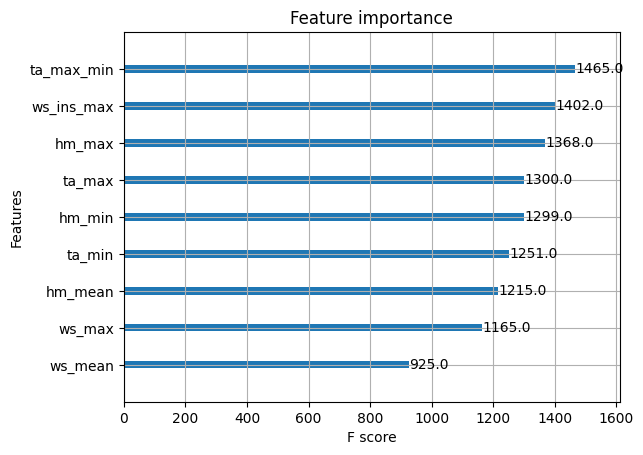

In [ ]:
# 내륙 지역(서울, 대구, 광주, 대전, 층남, 세종) 통합 피처 중요도 관찰
inland = pd.concat([inland1, inland2])
model = xgboost(inland)
Inland_ax = xgb.plot_importance(model)
Inland_ax

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

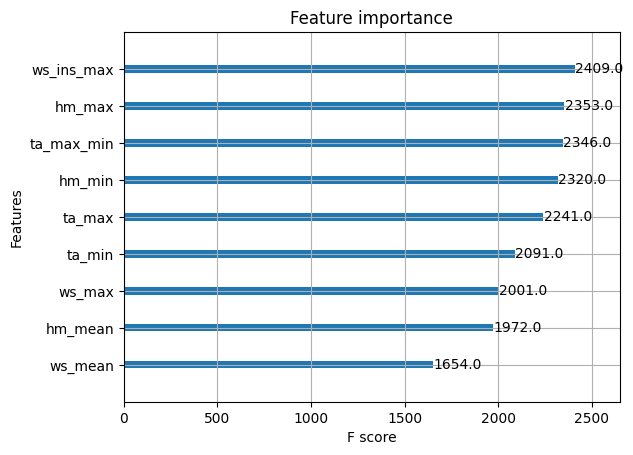

In [ ]:
# 동해안 ~ 태백산맥 지역 피처 중요도 관찰
model = xgboost(sea_mt)
Inland_ax = xgb.plot_importance(model)
Inland_ax

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

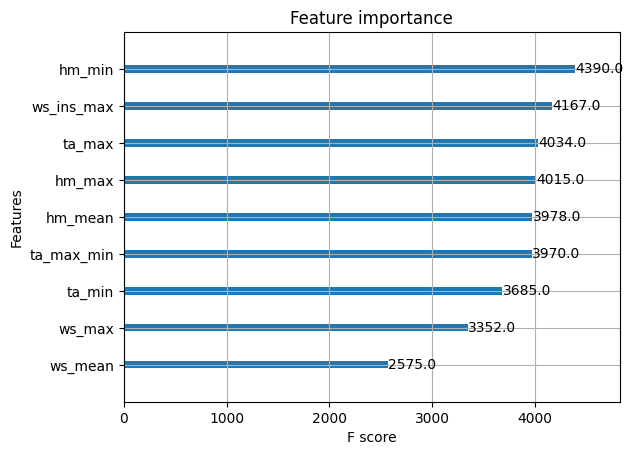

In [ ]:
# 내륙산간 지역 피처 중요도 관찰
model = xgboost(in_mt)
Inland_ax = xgb.plot_importance(model)
Inland_ax

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

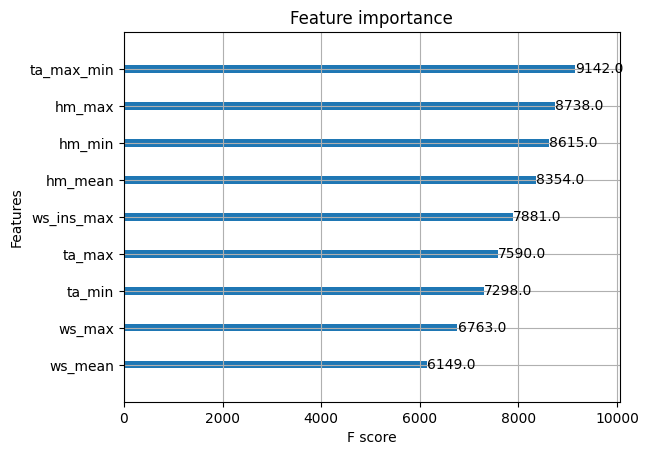

In [ ]:
# 서해안 지역 피처 중요도 관찰
model = xgboost(seohae)
Inland_ax = xgb.plot_importance(model)
Inland_ax

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

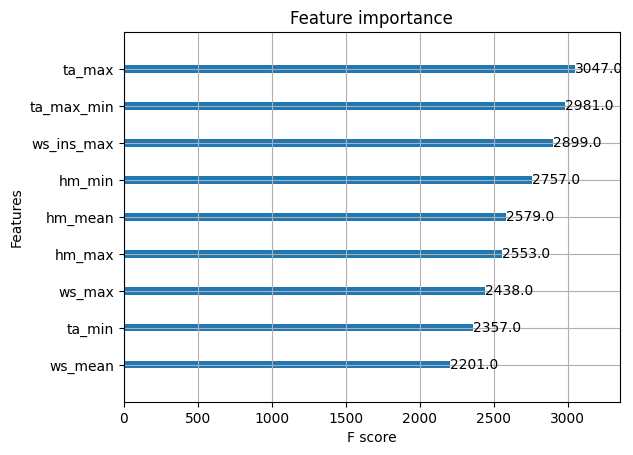

In [ ]:
# 남해안 지역 피처 중요도 관찰
model = xgboost(namhae)
Inland_ax = xgb.plot_importance(model)
Inland_ax